In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [3]:
df=pd.read_csv('file:///F:/New%20folder%20(9)/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
df=df.fillna(0)

In [5]:
df.shape

(101544, 60)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101544 entries, 0 to 101543
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               101544 non-null  object 
 1   continent                              101544 non-null  object 
 2   location                               101544 non-null  object 
 3   date                                   101544 non-null  object 
 4   total_cases                            101544 non-null  float64
 5   new_cases                              101544 non-null  float64
 6   new_cases_smoothed                     101544 non-null  float64
 7   total_deaths                           101544 non-null  float64
 8   new_deaths                             101544 non-null  float64
 9   new_deaths_smoothed                    101544 non-null  float64
 10  total_cases_per_million                101544 non-null  

In [7]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.015440e+05,101544.000000,101544.000000,1.015440e+05,101544.000000,101544.000000,101544.000000,101544.000000,101544.000000,101544.000000,...,101544.000000,101544.000000,101544.000000,101544.000000,101544.000000,101544.000000,101544.000000,101544.000000,101544.00000,101544.000000
mean,1.057460e+06,5822.191454,5781.999826,2.545742e+04,126.188175,125.513682,12972.282137,73.021057,72.476831,255.489520,...,8.114453,231.860392,7.297855,7.409295,22.593595,22.899096,2.471969,69.545435,0.65311,0.641853
std,7.363575e+06,37019.189665,36569.319402,1.639149e+05,744.235818,725.923103,24342.726446,196.595160,155.338945,506.894583,...,16.854638,137.498252,4.529262,10.010496,18.815719,33.073540,2.511315,17.635220,0.26215,7.515694
min,0.000000e+00,-74347.000000,-6223.000000,0.000000e+00,-1918.000000,-232.143000,0.000000,-2153.437000,-276.825000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-95.590000
25%,9.087500e+02,1.000000,4.714000,1.300000e+01,0.000000,0.000000,193.250000,0.031000,0.792000,2.576750,...,0.000000,133.982000,4.550000,0.000000,0.000000,0.000000,0.700000,66.600000,0.54500,0.000000
50%,1.229800e+04,61.000000,72.143000,1.990000e+02,1.000000,1.000000,1584.295500,6.913000,9.102500,27.972000,...,0.500000,228.467000,6.930000,2.000000,23.600000,0.000000,1.900000,74.250000,0.73400,0.000000
75%,1.378360e+05,750.250000,775.429000,2.657000e+03,12.000000,12.857000,13080.767000,64.683500,72.118000,237.430000,...,4.200000,317.840000,9.850000,11.200000,37.400000,44.600000,3.600000,78.510000,0.82500,0.000000
max,1.864185e+08,906017.000000,826388.429000,4.024103e+06,18060.000000,14735.857000,182165.275000,18293.675000,4083.500000,5881.048000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.95700,409.760000


In [8]:
df.corr().describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.190581,0.165337,0.167426,0.183135,0.159389,0.162637,0.197992,0.145633,0.177404,0.183195,...,-0.072595,-0.010606,0.047735,0.178362,0.121793,-0.012825,0.132985,0.115258,0.164381,0.059164
std,0.340785,0.318595,0.320838,0.338354,0.319748,0.324118,0.215435,0.196756,0.213625,0.202846,...,0.178160,0.189186,0.172777,0.235936,0.192522,0.171148,0.214610,0.242419,0.258467,0.142090
min,-0.184907,-0.203099,-0.204246,-0.201033,-0.219068,-0.223475,-0.206023,-0.142760,-0.179667,-0.184609,...,-0.337086,-0.273006,-0.256859,-0.230798,-0.089203,-0.263614,-0.301717,-0.229288,-0.210176,-0.033145
25%,-0.023977,-0.022526,-0.022701,-0.027780,-0.026116,-0.026532,0.070131,0.044735,0.063660,0.065994,...,-0.143238,-0.100026,-0.030381,-0.012615,0.000353,-0.095946,0.004262,0.025626,-0.048768,-0.002522
50%,0.043364,0.023873,0.025708,0.036754,0.020600,0.023046,0.152276,0.100703,0.125012,0.163000,...,-0.046647,-0.054856,0.006443,0.126180,0.054968,-0.031826,0.067033,0.080741,0.124092,0.020966
75%,0.163015,0.174058,0.175949,0.138067,0.137016,0.136710,0.317643,0.169748,0.214266,0.277865,...,-0.022356,-0.013897,0.053155,0.293932,0.142194,0.010366,0.180969,0.151300,0.221101,0.058154
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_cases                              1.057460e+06
new_cases                                5.822191e+03
new_cases_smoothed                       5.782000e+03
total_deaths                             2.545742e+04
new_deaths                               1.261882e+02
new_deaths_smoothed                      1.255137e+02
total_cases_per_million                  1.297228e+04
new_cases_per_million                    7.302106e+01
new_cases_smoothed_per_million           7.247683e+01
total_deaths_per_million                 2.554895e+02
new_deaths_per_million                   1.328804e+00
new_deaths_smoothed_per_million          1.322280e+00
reproduction_rate                        8.095080e-01
icu_patients                             1.053471e+02
icu_patients_per_million                 2.614022e+00
hosp_patients                            5.687996e+02
hosp_patients_per_million                2.079671e+01
weekly_icu_admissions                    2.381462e+00
weekly_icu_admissions_per_mi

In [10]:
df.min()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


iso_code                                         ABW
location                                 Afghanistan
date                                      2020-01-01
total_cases                                      0.0
new_cases                                   -74347.0
new_cases_smoothed                           -6223.0
total_deaths                                     0.0
new_deaths                                   -1918.0
new_deaths_smoothed                         -232.143
total_cases_per_million                          0.0
new_cases_per_million                      -2153.437
new_cases_smoothed_per_million              -276.825
total_deaths_per_million                         0.0
new_deaths_per_million                       -76.445
new_deaths_smoothed_per_million              -10.921
reproduction_rate                              -0.02
icu_patients                                     0.0
icu_patients_per_million                         0.0
hosp_patients                                 

In [11]:
df.max()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


iso_code                                          ZWE
location                                     Zimbabwe
date                                       2021-07-10
total_cases                               186418493.0
new_cases                                    906017.0
new_cases_smoothed                         826388.429
total_deaths                                4024103.0
new_deaths                                    18060.0
new_deaths_smoothed                         14735.857
total_cases_per_million                    182165.275
new_cases_per_million                       18293.675
new_cases_smoothed_per_million                 4083.5
total_deaths_per_million                     5881.048
new_deaths_per_million                        218.329
new_deaths_smoothed_per_million                 63.14
reproduction_rate                                5.77
icu_patients                                  28889.0
icu_patients_per_million                      192.735
hosp_patients               

In [12]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df['iso_code']=le.fit_transform(df['iso_code'])

In [16]:
df.dtypes

iso_code                                   int32
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [17]:
df=df.drop(['tests_units','iso_code','continent','date'],axis='columns')

In [18]:
df.head()

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,Afghanistan,1.0,1.0,0.0,0.0,0.0,0.0,0.026,0.026,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
1,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
2,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
3,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
4,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0


In [19]:
df.dtypes

location                                  object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_million                float64
weekly_icu_admissions                    float64
weekly_icu_admissions_per_million        float64
weekly_hosp_admissio

In [20]:
df=df.rename({'State/UTs':'State'},axis='columns')

In [21]:
x=df.drop(['location'],axis='columns')

In [22]:
y=df.location.values

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [24]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

99.98358718487394

In [25]:
print(classification_report(ytest,pred_tre))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       133
                          Africa       1.00      1.00      1.00       153
                         Albania       1.00      1.00      1.00       162
                         Algeria       1.00      1.00      1.00       159
                         Andorra       1.00      1.00      1.00       145
                          Angola       1.00      1.00      1.00       147
                        Anguilla       1.00      1.00      1.00        41
             Antigua and Barbuda       1.00      1.00      1.00       136
                       Argentina       1.00      1.00      1.00       174
                         Armenia       1.00      1.00      1.00       161
                           Aruba       1.00      1.00      1.00        22
                            Asia       1.00      1.00      1.00       175
                       Australia     

In [26]:
import sklearn.cluster as cluster

In [27]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

99.98358718487394

In [28]:
print(classification_report(ytest,pred_kne))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       133
                          Africa       1.00      1.00      1.00       153
                         Albania       0.98      1.00      0.99       162
                         Algeria       1.00      1.00      1.00       159
                         Andorra       1.00      1.00      1.00       145
                          Angola       0.99      1.00      0.99       147
                        Anguilla       0.95      0.98      0.96        41
             Antigua and Barbuda       0.97      1.00      0.99       136
                       Argentina       1.00      0.99      1.00       174
                         Armenia       0.96      0.93      0.94       161
                           Aruba       1.00      1.00      1.00        22
                            Asia       1.00      1.00      1.00       175
                       Australia     

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

7.2019432773109235

In [31]:
print(classification_report(ytest,pred_ada))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       133
                          Africa       1.00      1.00      1.00       153
                         Albania       0.00      0.00      0.00       162
                         Algeria       0.00      0.00      0.00       159
                         Andorra       0.00      0.00      0.00       145
                          Angola       0.00      0.00      0.00       147
                        Anguilla       0.00      0.00      0.00        41
             Antigua and Barbuda       0.00      0.00      0.00       136
                       Argentina       0.00      0.00      0.00       174
                         Armenia       0.00      0.00      0.00       161
                           Aruba       0.00      0.00      0.00        22
                            Asia       1.00      1.00      1.00       175
                       Australia     

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

99.98686974789915

In [34]:
print(classification_report(ytest,pred_bag))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       133
                          Africa       1.00      1.00      1.00       153
                         Albania       1.00      1.00      1.00       162
                         Algeria       1.00      1.00      1.00       159
                         Andorra       1.00      1.00      1.00       145
                          Angola       1.00      1.00      1.00       147
                        Anguilla       1.00      1.00      1.00        41
             Antigua and Barbuda       1.00      1.00      1.00       136
                       Argentina       1.00      1.00      1.00       174
                         Armenia       1.00      1.00      1.00       161
                           Aruba       1.00      1.00      1.00        22
                            Asia       1.00      1.00      1.00       175
                       Australia     

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

84.89036239495799

In [37]:
print(classification_report(ytest,pre_gau))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       133
                          Africa       1.00      1.00      1.00       153
                         Albania       0.96      0.61      0.75       162
                         Algeria       0.95      0.50      0.66       159
                         Andorra       0.91      0.56      0.69       145
                          Angola       0.81      0.98      0.89       147
                        Anguilla       0.00      0.00      0.00        41
             Antigua and Barbuda       0.54      0.99      0.70       136
                       Argentina       1.00      1.00      1.00       174
                         Armenia       0.84      0.53      0.65       161
                           Aruba       0.44      0.68      0.54        22
                            Asia       1.00      1.00      1.00       175
                       Australia     

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)*100
accu_ada

7.753413865546219

In [40]:
print(classification_report(ytest,pre_ada))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       133
                          Africa       1.00      1.00      1.00       153
                         Albania       0.00      0.00      0.00       162
                         Algeria       0.00      0.00      0.00       159
                         Andorra       0.00      0.00      0.00       145
                          Angola       0.00      0.00      0.00       147
                        Anguilla       0.00      0.00      0.00        41
             Antigua and Barbuda       0.00      0.00      0.00       136
                       Argentina       0.00      0.00      0.00       174
                         Armenia       0.00      0.00      0.00       161
                           Aruba       0.00      0.00      0.00        22
                            Asia       1.00      1.00      1.00       175
                       Australia     

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

99.96717436974791

In [43]:
print(classification_report(ytest,pre_etc))

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       133
                          Africa       1.00      1.00      1.00       153
                         Albania       1.00      1.00      1.00       162
                         Algeria       1.00      1.00      1.00       159
                         Andorra       1.00      1.00      1.00       145
                          Angola       1.00      1.00      1.00       147
                        Anguilla       1.00      1.00      1.00        41
             Antigua and Barbuda       1.00      1.00      1.00       136
                       Argentina       1.00      1.00      1.00       174
                         Armenia       1.00      1.00      1.00       161
                           Aruba       1.00      1.00      1.00        22
                            Asia       1.00      1.00      1.00       175
                       Australia     

In [44]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier'],
    'Score': [ accu_tre,accu_l, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,BaggingClassifier,99.986870
0,DecisionTreeClassifier,99.983587
2,KNeighborsClassifier,99.983587
7,ExtraTreesClassifier,99.967174
1,RandomForestClassifier,84.890362
5,GaussianNB,84.890362
3,AdaBoostClassifier,7.753414
6,AdaBoostClassifier,7.753414


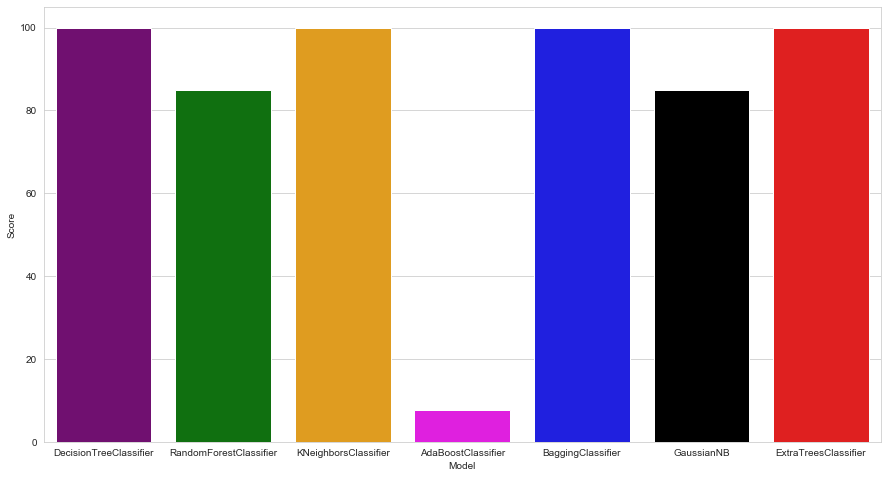

In [45]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [46]:
import sweetviz as sv

In [47]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [48]:
from IPython.display import IFrame

In [49]:
IFrame(src='Analyze.html',width=1000,height=600)